In [205]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from scipy.io import loadmat
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import glob
import pandas as pd
# from skimage.metrics import mean_squared_error as mse
# from skimage.metrics import peak_signal_noise_ratio as psnr
# from skimage.metrics import structural_similarity as ssim

import scienceplots

plt.style.use(['science', 'notebook', 'grid']) 

## EJERCICIO 2

### Variando detectores

In [206]:
def get_detector(file):
    return np.int64(file.split('_')[3])
def get_angles(file):
    return np.int64(file.split('_')[3])
def get_noise(file):
    return np.float64(file.split('_')[-1].split('.mat')[0])
def split_noise(files_noise, noise_level):
    result = []
    for i in range(len(files_noise)): # Me quedo solo con el nivel de ruido 0.01
    # print(np.float64(files_detects[i].split('_')[-1].split('.mat')[0]))
        if np.float64(files_noise[i].split('_')[-1].split('.mat')[0]) != noise_level:
            continue
        result.append(files_noise[i])
    return result

def get_error(files, originals,  art_type, art_ex_type, get_parameter):
    parameter = np.array([get_parameter(file) for file in files])
    # print(parameter)
    index = np.argsort(parameter)
    parameter = parameter[index]
    print(parameter)
    files = np.array(files)[index]
    print(len(originals), len(index))
    originals = np.array(originals)[index]


    images_detects = np.array([loadmat(file)[art_type] for file in files])
    images_originals = np.array([loadmat(file)[art_ex_type] for file in originals])
    # print(images_detects[9].max())

    mse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(len(images_detects)):
        nor = images_originals[i].max()
        mse_values.append(mse(images_originals[i]/nor, images_detects[i]/nor))
        psnr_values.append(psnr(images_originals[i]/nor, images_detects[i]/nor))
        ssim_values.append(ssim(images_originals[i]/nor, images_detects[i]/nor, data_range=256))
    
    return mse_values, psnr_values, ssim_values, parameter

In [207]:
# path = "./resultados/colo/DETECTORES/kacz_detectores_*"
# path_original = './resultados/colo/DETECTORES/original_detectores_*'
methods = ['kacz', 'symk', 'randk', 'sart']
methods_mat = ['Xkacz', 'Xsymk', 'Xrand', 'Xsart']
path = './resultados/separados/img_'
path_original = './resultados/separados/img_ex_detects_*'

files = []
for met in methods:
    files.append(glob.glob(path + f'{met}_detects_*'))
files_originals = glob.glob(path_original)

mse_values, psnr_values, ssim_values, detectores = [], [], [], []

# recorto todos los que no tienen ruido de 0.01
for i in range(len(files)):
    files[i] = split_noise(files[i], 0.01)
    MSE, PSNR, SSIM, DETECTORES = get_error(files[i], files_originals, methods_mat[i], 'img_ex_detects', get_detector)
    mse_values.append(MSE)
    psnr_values.append(PSNR)
    ssim_values.append(SSIM)
    detectores.append(DETECTORES)



# detectores = np.array([get_detector(file) for file in files_detects])
# print(detectores)
# index = np.argsort(detectores)
# detectores = detectores[index]
# print(detectores)
# files_detects = np.array(files_detects)[index]
# files_originals = np.array(files_originals)[index]

# images_detects = np.array([loadmat(file)['Xkacz'] for file in files_detects])
# images_originals = np.array([loadmat(file)['img_ex_detects'] for file in files_originals])
# print(images_detects[9].max())

# mse_values = []
# psnr_values = []
# ssim_values = []

# for i in range(len(images_detects)):
#     nor = images_originals[i].max()
#     mse_values.append(mse(images_originals[i]/nor, images_detects[i]/nor))
#     psnr_values.append(psnr(images_originals[i]/nor, images_detects[i]/nor))
#     ssim_values.append(ssim(images_originals[i]/nor, images_detects[i]/nor, data_range=256))

# Cropeo los que quedaron mal
for i in range(len(detectores)):
    detectores[i] = np.delete(detectores[i], -4)
    mse_values[i] = np.delete(mse_values[i], -4)
    psnr_values[i] = np.delete(psnr_values[i], -4)
    ssim_values[i] = np.delete(ssim_values[i], -4)


[ 60  87 113 140 167 193 220 247 273 300]
10 10
[ 60  87 113 140 167 193 220 247 273 300]
10 10
[ 60  87 113 140 167 193 220 247 273 300]
10 10
[ 60  87 113 140 167 193 220 247 273 300]
10 10


#### Plotting

4
0.0
0.3333333333333333
0.6666666666666666
1.0


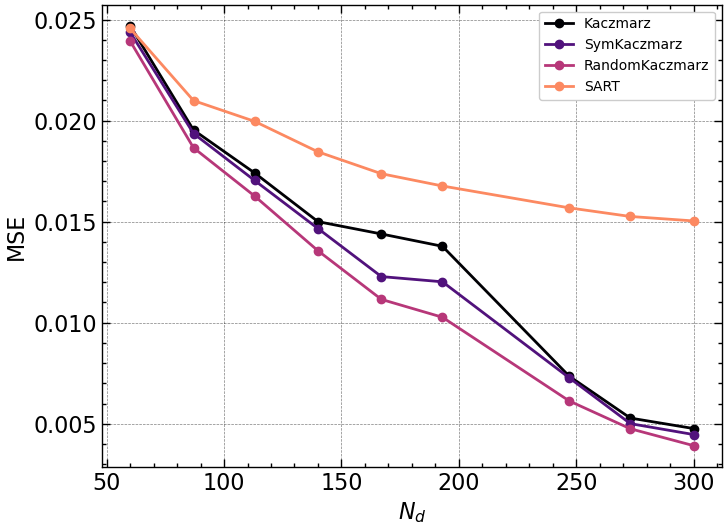

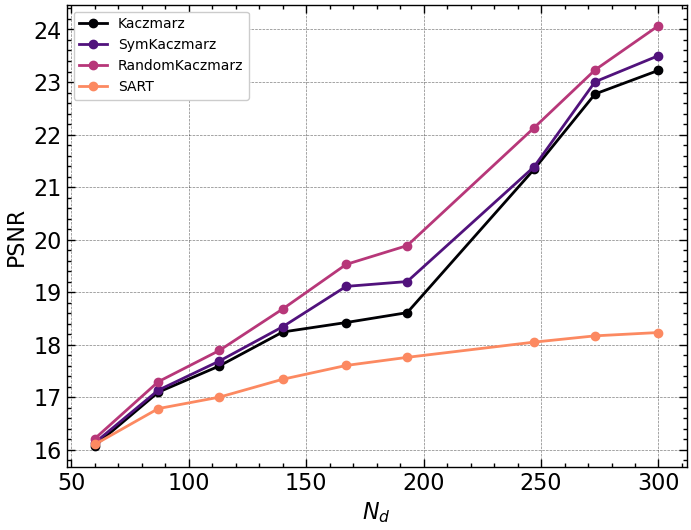

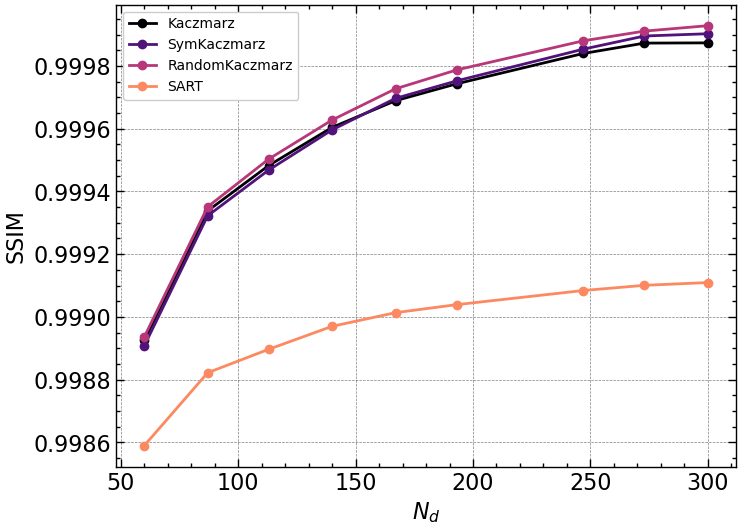

In [226]:
# elimino el valor en la posición -4 de los detectores

cm = plt.get_cmap('magma')
plt.figure(figsize=(8, 6))
print(len(mse_values))

names_methods = ['Kaczmarz', 'SymKaczmarz', 'RandomKaczmarz', 'SART']
save_path = "../doc/images/ej_2/detectores/"
for i in range(len(mse_values)):
    plt.plot(detectores[i], mse_values[i], '-o', label=names_methods[i], color=cm(1.0*i/len(mse_values)))
    plt.xlabel(r'$N_d$')
    plt.ylabel('MSE')
    plt.legend(fontsize=10)
    plt.savefig(save_path + 'mse.png', dpi=300)

plt.figure(figsize=(8, 6))
for i in range(len(mse_values)):
    plt.plot(detectores[i], psnr_values[i], '-o', label=names_methods[i], color=cm(1.0*i/len(mse_values)))
    plt.xlabel(r'$N_d$')
    plt.ylabel('PSNR')
    plt.legend(fontsize=10)
    plt.savefig(save_path + 'psnr.png', dpi=300)

plt.figure(figsize=(8, 6))
for i in range(len(mse_values)):
    print(1.0*i/(len(mse_values)-1))
    plt.plot(detectores[i], ssim_values[i], '-o', label=names_methods[i], color=cm(1.0*i/len(mse_values)))
    plt.xlabel(r'$N_d$')
    plt.ylabel('SSIM')
    plt.legend(fontsize=10)
    plt.savefig(save_path + 'ssim.png', dpi=300)

### Variando angulos

In [227]:
methods = ['kacz', 'symk', 'randk', 'sart']
methods_mat = ['Xkacz', 'Xsymk', 'Xrand', 'Xsart']
path = './resultados/separados/img_'
path_original = './resultados/separados/img_ex_angles_*'

files = []
for met in methods:
    files.append(glob.glob(path + f'{met}_angles_*'))
files_originals = glob.glob(path_original)

mse_values, psnr_values, ssim_values, angles = [], [], [], []

# recorto todos los que no tienen ruido de 0.01
for i in range(len(files)):
    files[i] = split_noise(files[i], 0.01)
    MSE, PSNR, SSIM, ANGLES = get_error(files[i], files_originals, methods_mat[i], 'img_ex_angles', get_angles)
    mse_values.append(MSE)
    psnr_values.append(PSNR)
    ssim_values.append(SSIM)
    angles.append(ANGLES)

# Cropeo los que quedaron mal
for i in range(len(angles)):
    angles[i] = np.delete(angles[i], -1)
    mse_values[i] = np.delete(mse_values[i], -1)
    psnr_values[i] = np.delete(psnr_values[i], -1)
    ssim_values[i] = np.delete(ssim_values[i], -1)

[ 20  40  60  80 100 120 140 160 180 200]
10 10
[ 20  40  60  80 100 120 140 160 180 200]
10 10
[ 20  40  60  80 100 120 140 160 180 200]
10 10
[ 20  40  60  80 100 120 140 160 180 200]
10 10


4
0.0
0.3333333333333333
0.6666666666666666
1.0


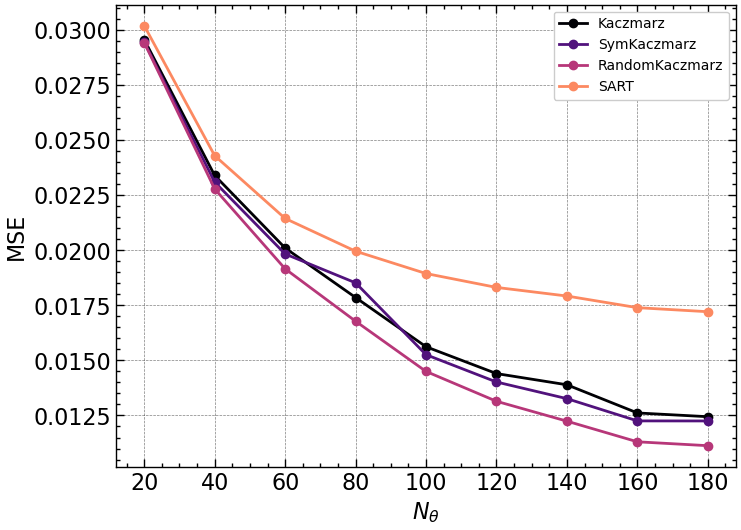

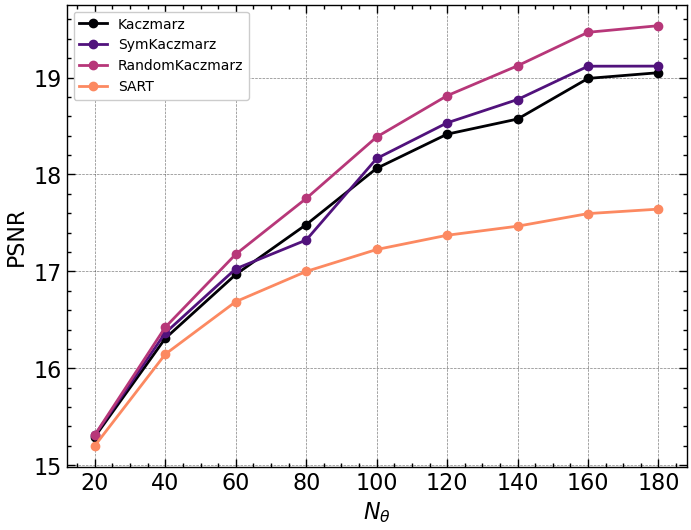

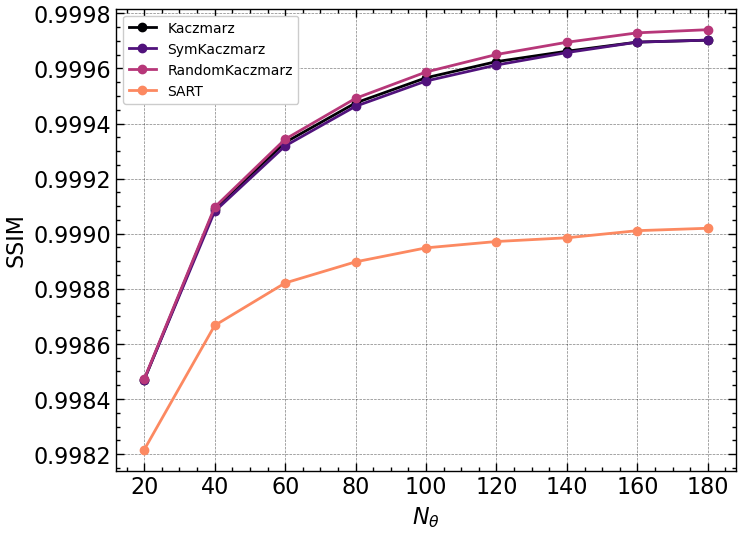

In [228]:
cm = plt.get_cmap('magma')
plt.figure(figsize=(8, 6))
print(len(mse_values))

names_methods = ['Kaczmarz', 'SymKaczmarz', 'RandomKaczmarz', 'SART']
save_path = "../doc/images/ej_2/angles/"

for i in range(len(mse_values)):
    plt.plot(angles[i], mse_values[i], '-o', label=names_methods[i], color=cm(1.0*i/len(mse_values)))
    plt.xlabel(r'$N_\theta$')
    plt.ylabel('MSE')
    plt.legend(fontsize=10)
    plt.savefig(save_path + 'mse.png', dpi=300)

plt.figure(figsize=(8, 6))
for i in range(len(mse_values)):
    plt.plot(angles[i], psnr_values[i], '-o', label=names_methods[i], color=cm(1.0*i/len(mse_values)))
    plt.xlabel(r'$N_\theta$')
    plt.ylabel('PSNR')
    plt.legend(fontsize=10)
    plt.savefig(save_path + 'psnr.png', dpi=300)

plt.figure(figsize=(8, 6))
for i in range(len(mse_values)):
    # print(1.0*i/(len(mse_values)-1))
    plt.plot(angles[i], ssim_values[i], '-o', label=names_methods[i], color=cm(1.0*i/len(mse_values)))
    plt.xlabel(r'$N_\theta$')
    plt.ylabel('SSIM')
    plt.legend(fontsize=10)
    plt.savefig(save_path + 'ssim.png', dpi=300)

### Variando el nivel de ruido

In [229]:
def get_error_noises(files, originals,  art_type, art_ex_type, get_parameter):
    parameter = np.array([get_parameter(file) for file in files])
    print(parameter)
    index = np.argsort(parameter)
    parameter = parameter[index]
    print(parameter)
    files = np.array(files)[index]
    if len(originals) != 1:
        raise ValueError('Originals debe ser una lista de un solo elemento')
    originals = originals[0]

    print(len(originals), len(files[0]))


    images_detects = np.array([loadmat(file)[art_type] for file in files])
    image_originals = loadmat(originals)[art_ex_type]
    # print(image_originals)
    # plt.imshow(image_originals, cmap='gray')
    # plt.show()
    # print(images_detects[9].max())

    mse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(len(images_detects)):
        nor = image_originals.max()
        mse_values.append(mse(image_originals/nor, images_detects[i]/nor))
        psnr_values.append(psnr(image_originals/nor, images_detects[i]/nor))
        ssim_values.append(ssim(image_originals/nor, images_detects[i]/nor, data_range=256))
    
    return mse_values, psnr_values, ssim_values, parameter

In [231]:
methods = ['kacz', 'symk', 'randk', 'sart']
methods_mat = ['Xkacz', 'Xsymk', 'Xrand', 'Xsart']
path = './resultados/noise/img_'
path_original = './resultados/noise/img_ex_*'

files = []
for met in methods:
    files.append(glob.glob(path + f'{met}_*'))
files_originals = glob.glob(path_original)

print(len(files[0]))    # niveles de ruido

mse_values, psnr_values, ssim_values, noises_values = [], [], [], []

# recorto todos los que no tienen ruido de 0.01
for i in range(len(files)):
    MSE, PSNR, SSIM, NOISES = get_error_noises(files[i], files_originals, methods_mat[i], 'img_ex_detects', get_noise)
    mse_values.append(MSE)
    psnr_values.append(PSNR)
    ssim_values.append(SSIM)
    noises_values.append(NOISES)

10
[0.03 0.04 0.05 0.02 0.08 0.07 0.1  0.06 0.09 0.01]
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
51 72
[0.08 0.07 0.06 0.1  0.09 0.01 0.03 0.04 0.05 0.02]
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
51 72
[0.09 0.01 0.06 0.1  0.07 0.08 0.02 0.05 0.04 0.03]
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
51 73
[0.01 0.09 0.06 0.1  0.07 0.08 0.02 0.05 0.04 0.03]
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
51 72


#### Plotting

4


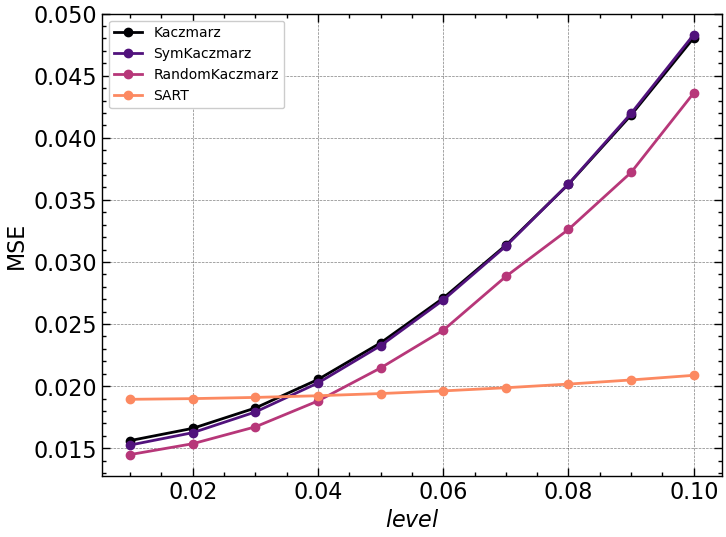

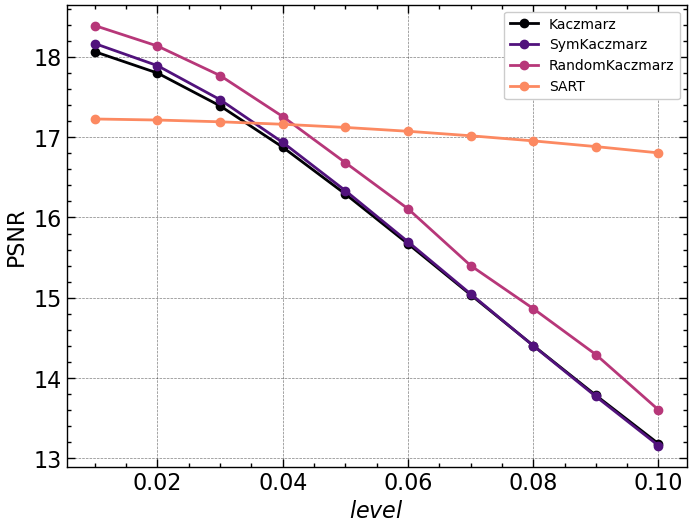

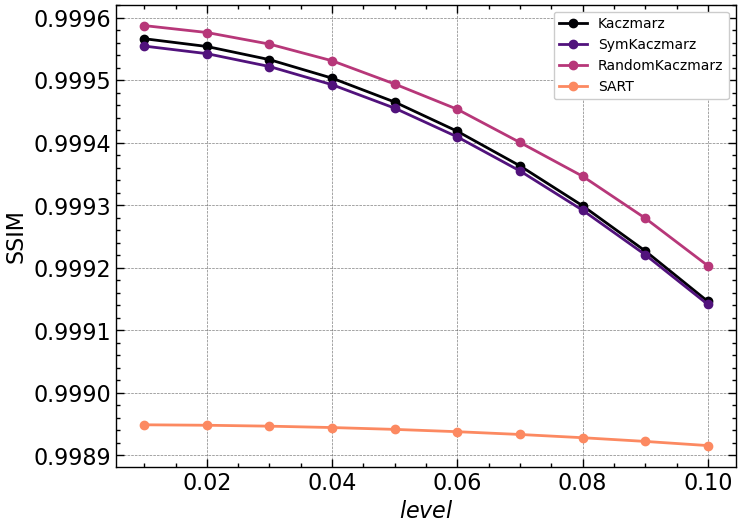

In [233]:
cm = plt.get_cmap('magma')
plt.figure(figsize=(8, 6))
print(len(mse_values))

names_methods = ['Kaczmarz', 'SymKaczmarz', 'RandomKaczmarz', 'SART']
save_path = "../doc/images/ej_2/noises/"

for i in range(len(mse_values)):
    plt.plot(noises_values[i], mse_values[i], '-o', label=names_methods[i], color=cm(1.0*i/len(mse_values)))
    plt.xlabel(r'$level$')
    plt.ylabel('MSE')
    plt.legend(fontsize=10)
    plt.savefig(save_path + 'mse.png', dpi=300)

plt.figure(figsize=(8, 6))
for i in range(len(mse_values)):
    plt.plot(noises_values[i], psnr_values[i], '-o', label=names_methods[i], color=cm(1.0*i/len(mse_values)))
    plt.xlabel(r'$level$')
    plt.ylabel('PSNR')
    plt.legend(fontsize=10)
    plt.savefig(save_path + 'psnr.png', dpi=300)

plt.figure(figsize=(8, 6))
for i in range(len(mse_values)):
    # print(1.0*i/(len(mse_values)-1))
    plt.plot(noises_values[i], ssim_values[i], '-o', label=names_methods[i], color=cm(1.0*i/len(mse_values)))
    plt.xlabel(r'$level$')
    plt.ylabel('SSIM')
    plt.legend(fontsize=10)
    plt.savefig(save_path + 'ssim.png', dpi=300)

# # elimino el valor en la posición -4 de los detectores
# plt.figure(figsize=(16, 8))

# for i in range(len(mse_values)):

#     plt.subplot(1, 3, 1)
#     plt.plot(noises_values[i], mse_values[i], '-o', label=methods[i])
#     plt.xlabel('Número de noises')
#     plt.ylabel('MSE')
#     plt.legend()

#     plt.subplot(1, 3, 2)
#     plt.plot(noises_values[i], psnr_values[i], '-o', label=methods[i])
#     plt.xlabel('Número de noises')
#     plt.ylabel('PSNR')
#     plt.legend()

#     plt.subplot(1, 3, 3)
#     plt.plot(noises_values[i], ssim_values[i], '-o', label=methods[i])
#     plt.xlabel('Número de noises')
#     plt.ylabel('SSIM')
#     plt.legend(fontsize = 'small')

### Analisis de tiempo

Tiempos obtenidos en matlab:
Ejercicio 2 - Tiempos de cada algoritmo
Prueba de tiempo
N = 240
N_iter = 10
angle_fijo = 100
detect_fijo = 128


**Kaczmarz**
Elapsed time is 17.297881 seconds.

**Kaczmarz simetrico**
Elapsed time is 41.817230 seconds.

**Kaczmarz aleatorio**
Elapsed time is 15.983288 seconds.

**Kaczmarz SART**
Elapsed time is 0.066136 seconds.
>>

(240, 240)


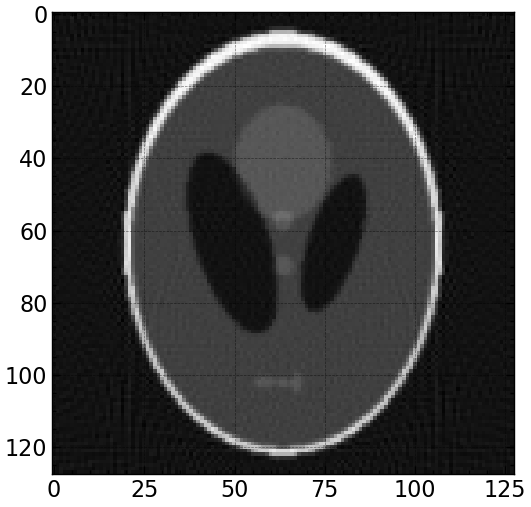

In [199]:
import cv2
N_detect = 128
N = 240
x = loadmat('./resultados/tiempo/img_ex_0.mat')['image']
print(x.shape)
x = cv2.resize(x, (N_detect, N_detect), interpolation=cv2.INTER_LINEAR)

VIEW = 100
THETA = np.linspace(0, 180, VIEW + 1)
THETA = THETA[:-1]

A = lambda x: radon(x, THETA, circle=False).astype(np.float32)
AINV = lambda y: iradon(y, THETA, circle=False, output_size=N_detect).astype(np.float32)

p = A(x)
x_full = AINV(p)

plt.imshow(x_full, cmap='gray')

### Expectation Maximization

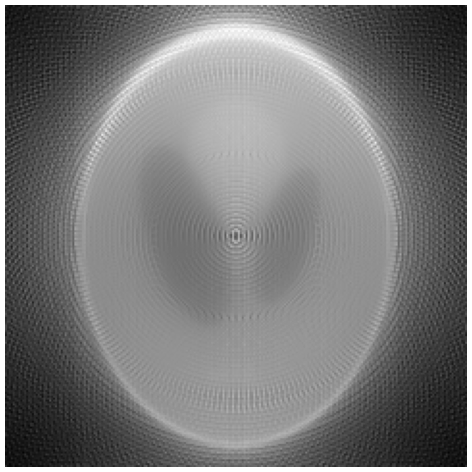

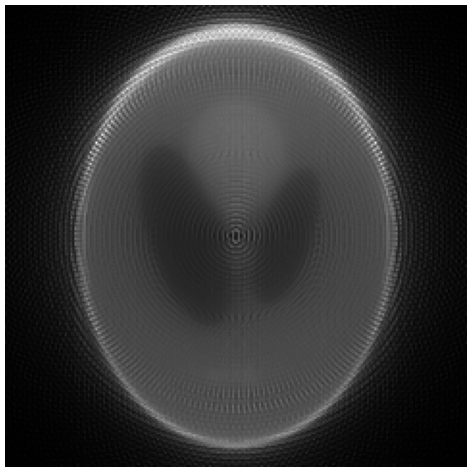

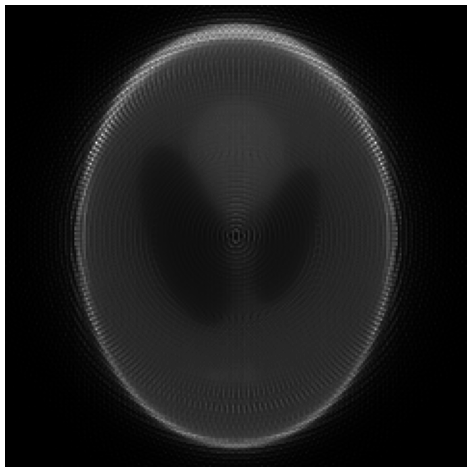

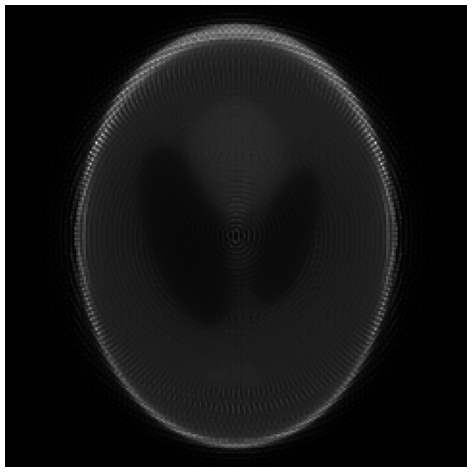

In [234]:
path = './resultados/exp_max/img_em_it_*'
path_original = './resultados/exp_max/original_em.mat'
files = glob.glob(path)

iters = np.array([np.int64(file.split('_')[-1].split('.mat')[0]) for file in files])

index = np.argsort(iters)
iters = iters[index]
files = np.array(files)[index]
images = images = np.array([loadmat(file)['x_0'] for file in files])
image_original = loadmat(path_original)['x_ex']

mse_val_ex, psnr_val_ex, ssim_val_ex = [], [], []

for i in range(len(images)):
    nor = image_original.max()
    mse_val_ex.append(mse(image_original/nor, images[i]/nor))
    psnr_val_ex.append(psnr(image_original/nor, images[i]/nor))
    ssim_val_ex.append(ssim(image_original/nor, images[i]/nor, data_range=256))

index_plot = np.linspace(0, len(images)-1, 4, dtype=np.int64)

# Ploteo las imagenes
for i in index_plot:
    plt.figure(figsize=(8, 6))
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.savefig(f'../doc/images/ej_2/exp_max/em_it_{i}.png', dpi=300)
    

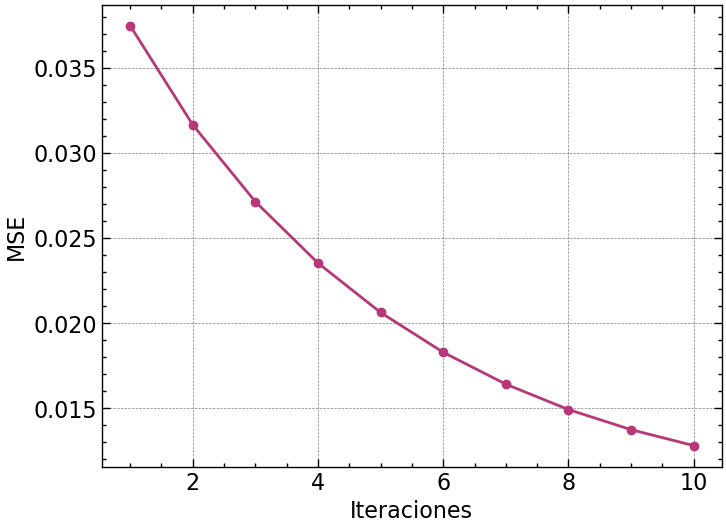

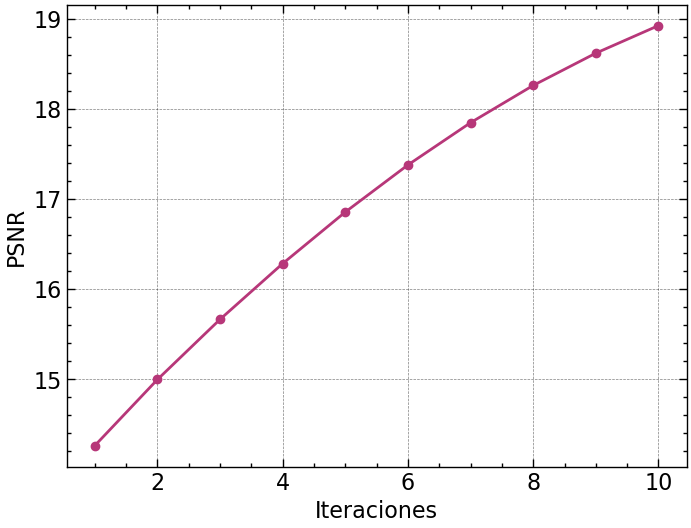

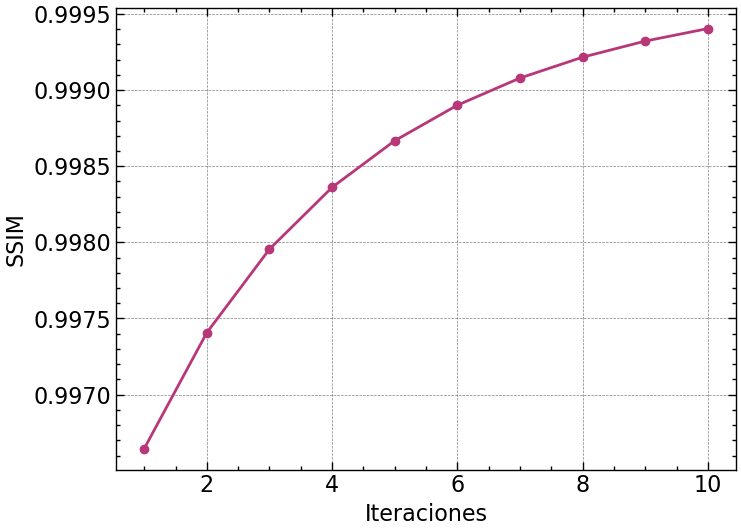

In [238]:
cm = plt.get_cmap('magma')

plt.figure(figsize=(8, 6))
plt.plot(iters, mse_val_ex, '-o', color=cm(0.5))
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.savefig(f'../doc/images/ej_2/exp_max/mse.png', dpi=300)
# plt.title('MSE')

plt.figure(figsize=(8, 6))
plt.plot(iters, psnr_val_ex, '-o', color=cm(0.5))
plt.xlabel('Iteraciones')
plt.ylabel('PSNR')
plt.savefig(f'../doc/images/ej_2/exp_max/psnr.png', dpi=300)
# plt.title('PSNR')

plt.figure(figsize=(8, 6))
plt.plot(iters, ssim_val_ex, '-o', color=cm(0.5))
plt.xlabel('Iteraciones')
plt.ylabel('SSIM')
plt.savefig(f'../doc/images/ej_2/exp_max/ssim.png', dpi=300)
# plt.title('SSIM')